In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt


from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score, auc, roc_curve
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, learning_curve, GridSearchCV, validation_curve

In [2]:
data1 = pd.read_csv("datasets/pulsar/pulsar_stars.csv", dtype=np.float32)
Y1 = np.array(data1.pop("target_class"))
X1 = np.array(data1)

data2 = pd.read_csv("datasets/mobile/train.csv", dtype=np.float32)
Y2 = np.array(data2.pop("price_range"))
X2 = np.array(data2)

In [3]:
X_train, X_test, y_train, y_test = train_test_split( X1, Y1, test_size = 0.3)
sc = StandardScaler()
x_train_norm = sc.fit_transform(X_train)
x_test_norm = sc.transform(X_test)

0.001 linear
0.001 poly
0.001 rbf
0.01 linear
0.01 poly
0.01 rbf
0.1 linear
0.1 poly
0.1 rbf
1.0 linear
1.0 poly
1.0 rbf
10.0 linear
10.0 poly
10.0 rbf
100.0 linear
100.0 poly
100.0 rbf


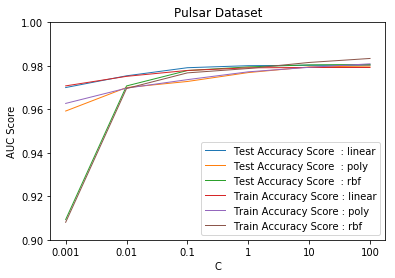

In [4]:
seed = 0
n_cv = 5
kernels = ['linear', 'poly', 'rbf']
low = -3
high = 3
C = np.power(10.0, range(low,high))
parameter_length = len(C)

auc_test = np.zeros((parameter_length, len(kernels)))
auc_train = np.zeros((parameter_length, len(kernels)))



for i in range(parameter_length):
    for k in range(len(kernels)):
        print(C[i], kernels[k])
        svc = SVC(kernel = kernels[k], C=C[i], probability=True)
        svc.fit(x_train_norm,y_train)
        y_pred_test = svc.predict(x_test_norm)
        y_pred_train = svc.predict(x_train_norm)
        auc_test[i,k] = accuracy_score(y_test, y_pred_test)
        auc_train[i,k] = accuracy_score(y_train, y_pred_train)

for k in range(len(kernels)):
    plt.plot(auc_test[:,k], linewidth=1, label="Test Accuracy Score  : "+kernels[k])
for k in range(len(kernels)):
    plt.plot(auc_train[:,k], linewidth=1, label="Train Accuracy Score : "+kernels[k])

plt.legend(loc='lower right')
plt.ylim(0.9, 1.0)
np.set_printoptions(precision=3)
plt.xticks(range(parameter_length),[str(10**i) for i in range(low, high)])
plt.xlabel("C")
plt.ylabel("AUC Score")
plt.title("Pulsar Dataset")
plt.show()

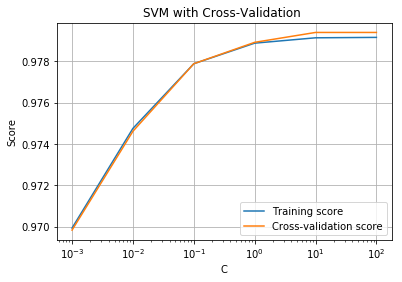

In [5]:
svm_linear = SVC(kernel='linear', random_state=seed)
train_scores, test_scores = validation_curve(svm_linear, x_train_norm, y_train, param_name="C", param_range=C, cv=n_cv, n_jobs=-1)

plt.figure()
plt.semilogx(C, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(C, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('SVM with Cross-Validation ')
plt.xlabel('C')
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

Best parameters for SVM:
{'C': 10.0}
Accuracy score of Linear SVM with best parameters is 98.03%
ROC score of Linear SVM with best parameters is 91.98%
F1 score of Linear SVM with best parameters is 88.60%


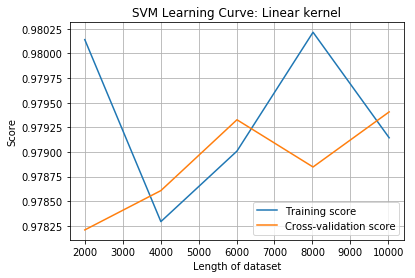

In [6]:
svm_linear = SVC(kernel='linear', random_state=seed)
parameters = {'C' : C}

clf = GridSearchCV(svm_linear, param_grid=parameters, cv=n_cv, n_jobs=-1)

clf.fit(x_train_norm, y_train)
print("Best parameters for SVM:")
print(clf.best_params_)
y_pred = clf.predict(x_test_norm)
print('Accuracy score of Linear SVM with best parameters is %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
print('ROC score of Linear SVM with best parameters is %.2f%%' % (roc_auc_score(y_test, y_pred) * 100))
print('F1 score of Linear SVM with best parameters is %.2f%%' % (f1_score(y_test, y_pred) * 100))

train_sizes=np.linspace(0.2, 1.0, 5)
svm_linear = SVC(kernel='linear', random_state=seed, C = clf.best_params_['C'])
train_sizes, train_scores, test_scores = learning_curve(svm_linear, x_train_norm, y_train, cv=n_cv, train_sizes=train_sizes, n_jobs = -1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure()
plt.title("SVM Learning Curve: Linear kernel")
plt.xlabel("Length of dataset")
plt.ylabel("Score")
plt.grid()
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.legend(loc="best")
plt.show()

Best parameters for rbf SVM:
{'C': 10.0}
Accuracy score of rbf SVM with best parameters is 98.04%
ROC score of rbf SVM with best parameters is 91.62%
F1 score of rbf SVM with best parameters is 88.60%


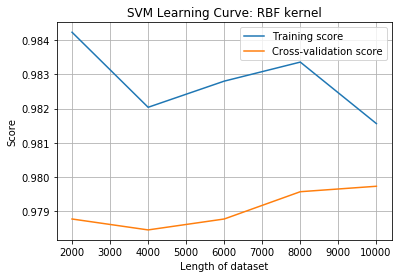

In [7]:
svm_rbf = SVC(kernel='rbf', random_state=seed)
parameters = {'C' : C}

clf = GridSearchCV(svm_rbf, param_grid=parameters, cv=n_cv, n_jobs=-1)

clf.fit(x_train_norm, y_train)
print("Best parameters for rbf SVM:")
print(clf.best_params_)
y_pred = clf.predict(x_test_norm)
print('Accuracy score of rbf SVM with best parameters is %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
print('ROC score of rbf SVM with best parameters is %.2f%%' % (roc_auc_score(y_test, y_pred) * 100))
print('F1 score of rbf SVM with best parameters is %.2f%%' % (f1_score(y_test, y_pred) * 100))

train_sizes=np.linspace(0.2, 1.0, 5)
svm_rbf = SVC(kernel='rbf', random_state=seed, C = clf.best_params_['C'])
train_sizes, train_scores, test_scores = learning_curve(svm_rbf, x_train_norm, y_train, cv=n_cv, train_sizes=train_sizes, n_jobs = -1)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure()
plt.title("SVM Learning Curve: RBF kernel")
plt.xlabel("Length of dataset")
plt.ylabel("Score")
plt.grid()
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.legend(loc="best")
plt.show()

Best parameters for poly SVM:
{'C': 100.0}
Accuracy score of poly SVM with best parameters is 97.99%
ROC score of poly SVM with best parameters is 91.22%
F1 score of poly SVM with best parameters is 88.21%


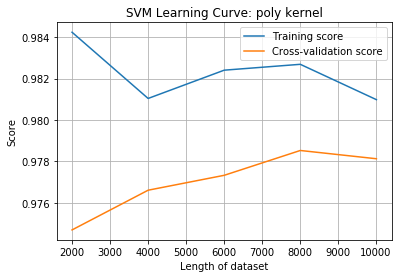

In [8]:
svm_poly = SVC(kernel='poly', random_state=seed)
parameters = {'C' : C}

clf = GridSearchCV(svm_poly, param_grid=parameters, cv=n_cv, n_jobs=-1)

clf.fit(x_train_norm, y_train)
print("Best parameters for poly SVM:")
print(clf.best_params_)
y_pred = clf.predict(x_test_norm)
print('Accuracy score of poly SVM with best parameters is %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
print('ROC score of poly SVM with best parameters is %.2f%%' % (roc_auc_score(y_test, y_pred) * 100))
print('F1 score of poly SVM with best parameters is %.2f%%' % (f1_score(y_test, y_pred) * 100))

train_sizes=np.linspace(0.2, 1.0, 5)

svm_poly = SVC(kernel='poly', random_state=seed, C = clf.best_params_['C'])
train_sizes, train_scores, test_scores = learning_curve(svm_poly, x_train_norm, y_train, cv=n_cv, train_sizes=train_sizes)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure()
plt.title("SVM Learning Curve: poly kernel")
plt.xlabel("Length of dataset")
plt.ylabel("Score")
plt.grid()
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.legend(loc="best")
plt.show()

Text(0.5, 0, 'False Positive Rate')

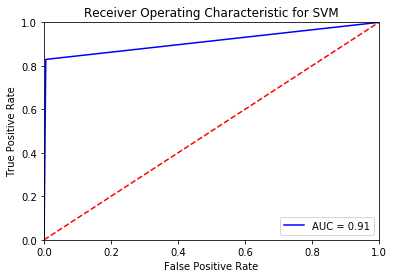

In [9]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic for SVM')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [10]:
#Mobile dataset

In [11]:
X_train, X_test, y_train, y_test = train_test_split( X2, Y2, test_size = 0.3)
sc = StandardScaler()
x_train_norm = sc.fit_transform(X_train)
x_test_norm = sc.transform(X_test)

0.001 linear
0.001 poly
0.001 rbf
0.01 linear
0.01 poly
0.01 rbf
0.1 linear
0.1 poly
0.1 rbf
1.0 linear
1.0 poly
1.0 rbf
10.0 linear
10.0 poly
10.0 rbf


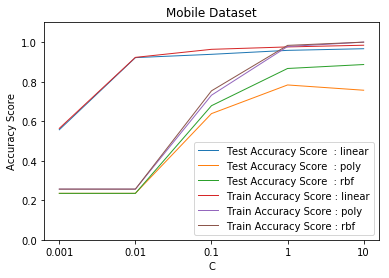

In [12]:
kernels = ['linear', 'poly', 'rbf']
low = -3
high = 2
C = np.power(10.0, range(low,high))
parameter_length = len(C)

acc_test = np.zeros((parameter_length, len(kernels)))
acc_train = np.zeros((parameter_length, len(kernels)))



for i in range(parameter_length):
    for k in range(len(kernels)):
        print(C[i], kernels[k])
        svc = SVC(kernel = kernels[k], C=C[i], probability=True)
        svc.fit(x_train_norm,y_train)
        y_pred_test = svc.predict(x_test_norm)
        y_pred_train = svc.predict(x_train_norm)
        acc_test[i,k] = accuracy_score(y_test, y_pred_test)
        acc_train[i,k] = accuracy_score(y_train, y_pred_train)

for k in range(len(kernels)):
    plt.plot(acc_test[:,k], linewidth=1, label="Test Accuracy Score  : "+kernels[k])
for k in range(len(kernels)):
    plt.plot(acc_train[:,k], linewidth=1, label="Train Accuracy Score : "+kernels[k])

plt.legend(loc='lower right')
plt.ylim(0.0, 1.1)
np.set_printoptions(precision=3)
plt.xticks(range(parameter_length),[str(10**i) for i in range(low, high)])
plt.xlabel("C")
plt.ylabel("Accuracy Score")
plt.title("Mobile Dataset")
plt.show()

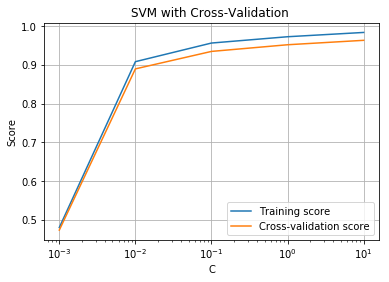

In [13]:
svm_linear = SVC(kernel='linear', random_state=seed)
train_scores, test_scores = validation_curve(svm_linear, x_train_norm, y_train, param_name="C", param_range=C, cv=n_cv, n_jobs=-1)

plt.figure()
plt.semilogx(C, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(C, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('SVM with Cross-Validation ')
plt.xlabel('C')
plt.ylabel("Score")
plt.legend(loc="best")
plt.grid()
plt.show()

Best parameters for SVM:
{'C': 10.0}
Accuracy score of Linear SVM with best parameters is 96.67%


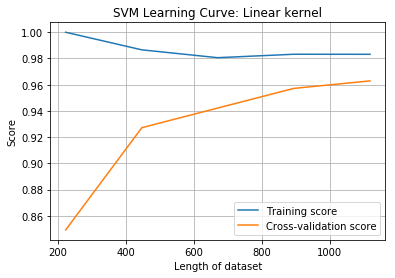

In [14]:
svm_linear = SVC(kernel='linear', random_state=seed)
parameters = {'C' : C}

clf = GridSearchCV(svm_linear, param_grid=parameters, cv=n_cv, n_jobs=-1)

clf.fit(x_train_norm, y_train)
print("Best parameters for SVM:")
print(clf.best_params_)
y_pred = clf.predict(x_test_norm)
print('Accuracy score of Linear SVM with best parameters is %.2f%%' % (accuracy_score(y_test, y_pred) * 100))

train_sizes=np.linspace(0.2, 1.0, 5)

svm_linear = SVC(kernel='linear', random_state=seed, C = clf.best_params_['C'])
train_sizes, train_scores, test_scores = learning_curve(svm_linear, x_train_norm, y_train, cv=n_cv, train_sizes=train_sizes)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure()
plt.title("SVM Learning Curve: Linear kernel")
plt.xlabel("Length of dataset")
plt.ylabel("Score")
plt.grid()
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.legend(loc="best")
plt.show()

Best parameters for rbf SVM:
{'C': 1.0}
Accuracy score of rbf SVM with best parameters is 86.67%


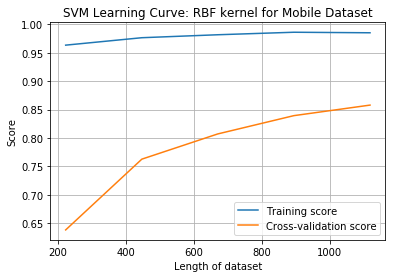

In [15]:
svm_rbf = SVC(kernel='rbf', random_state=seed)
parameter_length = len(C)
parameters = {'C' : C}

clf = GridSearchCV(svm_rbf, param_grid=parameters, cv=n_cv, n_jobs=-1)

clf.fit(x_train_norm, y_train)
print("Best parameters for rbf SVM:")
print(clf.best_params_)
y_pred = clf.predict(x_test_norm)
print('Accuracy score of rbf SVM with best parameters is %.2f%%' % (accuracy_score(y_test, y_pred) * 100))

train_sizes=np.linspace(0.2, 1.0, 5)
svm_rbf = SVC(kernel='rbf', random_state=seed, C = clf.best_params_['C'])
train_sizes, train_scores, test_scores = learning_curve(svm_rbf, x_train_norm, y_train, cv=n_cv, train_sizes=train_sizes)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure()
plt.title("SVM Learning Curve: RBF kernel for Mobile Dataset")
plt.xlabel("Length of dataset")
plt.ylabel("Score")
plt.grid()
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.legend(loc="best")
plt.show()

Best parameters for poly SVM:
{'C': 1.0}
Accuracy score of poly SVM with best parameters is 78.33%


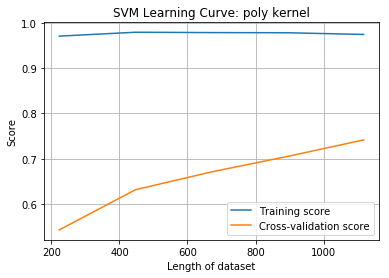

In [16]:
svm_poly = SVC(kernel='poly', random_state=seed)
parameters = {'C' : C}

clf = GridSearchCV(svm_poly, param_grid=parameters, cv=n_cv, n_jobs=-1)

clf.fit(x_train_norm, y_train)
print("Best parameters for poly SVM:")
print(clf.best_params_)
y_pred = clf.predict(x_test_norm)
print('Accuracy score of poly SVM with best parameters is %.2f%%' % (accuracy_score(y_test, y_pred) * 100))

train_sizes=np.linspace(0.2, 1.0, 5)
svm_poly = SVC(kernel='poly', random_state=seed, C = clf.best_params_['C'])
train_sizes, train_scores, test_scores = learning_curve(svm_poly, x_train_norm, y_train, cv=n_cv, train_sizes=train_sizes)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure()
plt.title("SVM Learning Curve: poly kernel")
plt.xlabel("Length of dataset")
plt.ylabel("Score")
plt.grid()
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.legend(loc="best")
plt.show()

Confusion matrix, without normalization
[[121  32   0   0]
 [ 15 120  22   0]
 [  0  24 114  11]
 [  0   0  26 115]]


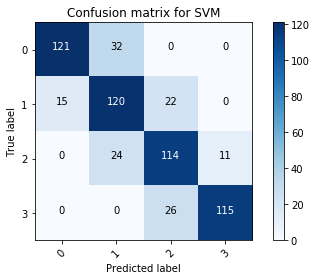

In [17]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3],
                      title='Confusion matrix for SVM')
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split( X1, Y1, test_size = 0.3)
sc = StandardScaler()
x_train_norm = sc.fit_transform(X_train)
x_test_norm = sc.transform(X_test)
svm_linear = SVC(kernel='linear', random_state=seed, C = 10)

%timeit svm_linear.fit(x_train_norm, y_train)

%timeit svm_linear.predict(x_train_norm)

svm_rbf = SVC(kernel='rbf', random_state=seed, C = 1)

%timeit svm_rbf.fit(x_train_norm, y_train)

%timeit svm_rbf.predict(x_train_norm)

svm_poly = SVC(kernel='poly', random_state=seed, C = 1)

%timeit svm_poly.fit(x_train_norm, y_train)

%timeit svm_poly.predict(x_train_norm)

511 ms ± 26.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
60.1 ms ± 247 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [25]:
X_train, X_test, y_train, y_test = train_test_split( X2, Y2, test_size = 0.3)
sc = StandardScaler()
x_train_norm = sc.fit_transform(X_train)
x_test_norm = sc.transform(X_test)
svm_linear = SVC(kernel='linear', random_state=seed, C = 10)

%timeit svm_linear.fit(x_train_norm, y_train)

%timeit svm_linear.predict(x_train_norm)

svm_rbf = SVC(kernel='rbf', random_state=seed, C = 1)

%timeit svm_rbf.fit(x_train_norm, y_train)

%timeit svm_rbf.predict(x_train_norm)

svm_poly = SVC(kernel='poly', random_state=seed, C = 1)

%timeit svm_poly.fit(x_train_norm, y_train)

%timeit svm_poly.predict(x_train_norm)

68.2 ms ± 3.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
4.18 ms ± 177 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
84.6 ms ± 3.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
64.6 ms ± 1.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
66.7 ms ± 3.99 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
36.1 ms ± 1.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
